In [30]:
import pandas as pd
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv("twitter_archive_master.csv")
df.drop(labels=["Unnamed: 0"],axis=1,inplace=True)

In [5]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,type,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,NaN,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,NaN,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,NaN,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


# Insight 1: Fonte dos tweets

In [19]:
df.source = df.source.str.extract(">(.*)</a>$")

In [27]:
df.source.value_counts()

Twitter for iPhone    1939
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64

# Insight 2: Top 10 das raças de cachorro

In [40]:
df.p1.value_counts().head(10)

golden_retriever      138
Labrador_retriever     95
Pembroke               88
Chihuahua              79
pug                    52
chow                   41
Pomeranian             38
toy_poodle             38
Samoyed                37
malamute               29
Name: p1, dtype: int64

# Insight 3: Média da quantidade de favoritagens

In [42]:
df.favorite_count.mean()

8772.740010116338

# Visualização: Quantidade de tweets do perfil WeRateDogs ao longo de quase 2 anos

In [44]:
df.created_at = df.created_at.apply(lambda data: pd.datetime(int(data[:4]), int(data[5:7]), int(data[8:10])))

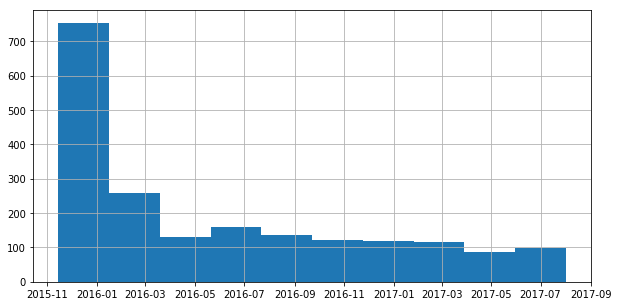

In [48]:
df.created_at.hist(figsize=(10,5))